In [58]:
import kagglehub


path = kagglehub.dataset_download("jahias/microsoft-adventure-works-cycles-customer-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-adventure-works-cycles-customer-data


In [59]:
import os


downloaded_files = os.listdir(path)
print("Files in the downloaded dataset:")
for file in downloaded_files:
    print(file)

Files in the downloaded dataset:
AWCustomers.csv
AWTest-Classification.csv
AWSales.csv
AWTest-Regression.csv


In [60]:
import pandas as pd

customers_df = pd.read_csv(os.path.join(path, 'AWCustomers.csv'))
display(customers_df.head())

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [61]:

print(customers_df.info())


selected_attributes = [
    'BirthDate',
    'Education',
    'Occupation',
    'Gender',
    'MaritalStatus',
    'HomeOwnerFlag',
    'NumberCarsOwned',
    'NumberChildrenAtHome',
    'TotalChildren',
    'YearlyIncome'
]

print("\nSelected attributes for predicting future bike buyers:")
for attr in selected_attributes:
    print(attr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            18361 non-null  int64 
 1   Title                 101 non-null    object
 2   FirstName             18361 non-null  object
 3   MiddleName            10572 non-null  object
 4   LastName              18361 non-null  object
 5   Suffix                3 non-null      object
 6   AddressLine1          18361 non-null  object
 7   AddressLine2          311 non-null    object
 8   City                  18361 non-null  object
 9   StateProvinceName     18361 non-null  object
 10  CountryRegionName     18361 non-null  object
 11  PostalCode            18361 non-null  object
 12  PhoneNumber           18361 non-null  object
 13  BirthDate             18361 non-null  object
 14  Education             18361 non-null  object
 15  Occupation            18361 non-null

In [62]:
customers_selected_df = customers_df[selected_attributes].copy()
display(customers_selected_df.head())

,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916
1,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076
2,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387
3,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481
4,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804


In [63]:
attribute_types = {}

attribute_types['BirthDate'] = 'Ratio (derived Age)'
attribute_types['Education'] = 'Ordinal'
attribute_types['Occupation'] = 'Nominal'
attribute_types['Gender'] = 'Nominal'
attribute_types['MaritalStatus'] = 'Nominal'
attribute_types['HomeOwnerFlag'] = 'Nominal'
attribute_types['NumberCarsOwned'] = 'Ratio (Discrete)'
attribute_types['NumberChildrenAtHome'] = 'Ratio (Discrete)'
attribute_types['TotalChildren'] = 'Ratio (Discrete)'
attribute_types['YearlyIncome'] = 'Ratio (Continuous)'

for attribute, data_type in attribute_types.items():
    print(f"{attribute}: {data_type}")

BirthDate: Ratio (derived Age)
Education: Ordinal
Occupation: Nominal
Gender: Nominal
MaritalStatus: Nominal
HomeOwnerFlag: Nominal
NumberCarsOwned: Ratio (Discrete)
NumberChildrenAtHome: Ratio (Discrete)
TotalChildren: Ratio (Discrete)
YearlyIncome: Ratio (Continuous)


In [64]:
print("Missing values per column in the selected attributes:")
print(customers_selected_df.isnull().sum())

Missing values per column in the selected attributes:
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64


In [65]:
from datetime import datetime

customers_selected_df['BirthDate'] = pd.to_datetime(customers_selected_df['BirthDate'])
current_year = datetime.now().year
customers_selected_df['Age'] = current_year - customers_selected_df['BirthDate'].dt.year

customers_selected_df = customers_selected_df.drop('BirthDate', axis=1)

display(customers_selected_df.head())

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Bachelors,Clerical,M,M,1,3,0,1,81916,38
1,Partial College,Clerical,M,M,1,2,1,2,81076,53
2,Bachelors,Clerical,F,S,0,3,0,0,86387,40
3,Partial College,Skilled Manual,M,M,1,2,1,2,61481,48
4,Partial College,Skilled Manual,M,S,1,1,0,0,51804,50


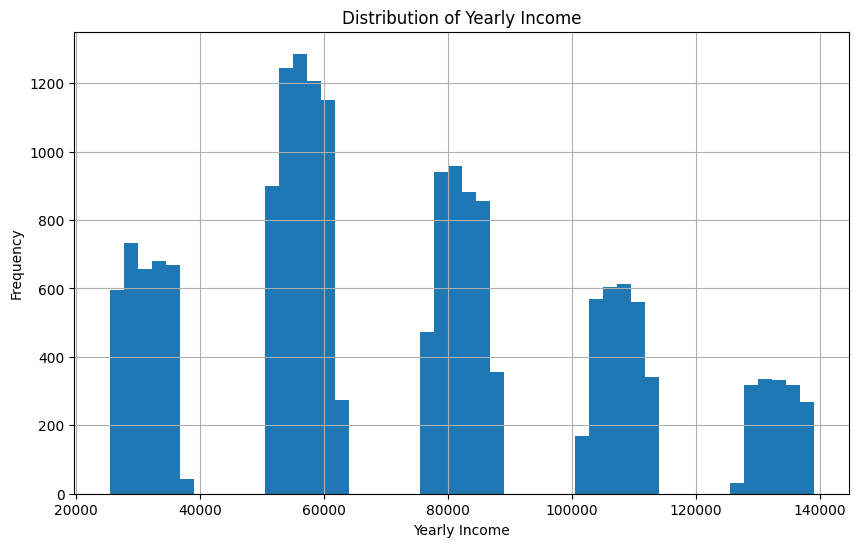

,YearlyIncome,YearlyIncome_Binned
0,81916,3
1,81076,3
2,86387,3
3,61481,2
4,51804,1


,count
YearlyIncome_Binned,
2,3673
0,3673
1,3672
4,3672
3,3671


In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
customers_selected_df['YearlyIncome'].hist(bins=50)
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()

customers_selected_df['YearlyIncome_Binned'] = pd.qcut(customers_selected_df['YearlyIncome'], q=5, labels=False, duplicates='drop')

display(customers_selected_df[['YearlyIncome', 'YearlyIncome_Binned']].head())
display(customers_selected_df['YearlyIncome_Binned'].value_counts())

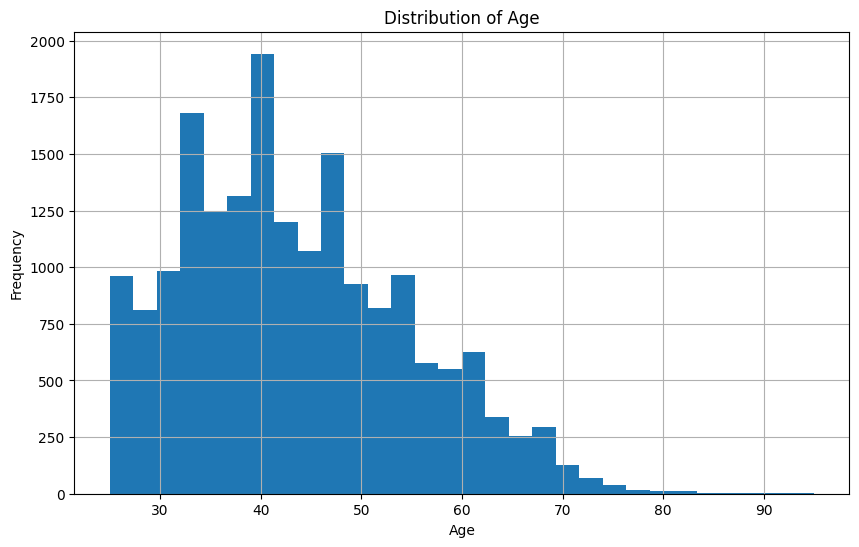

,Age,Age_Binned
0,38,1
1,53,3
2,40,2
3,48,3
4,50,3


,count
Age_Binned,
0,3849
1,3793
3,3578
4,3573
2,3568


In [67]:
plt.figure(figsize=(10, 6))
customers_selected_df['Age'].hist(bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


customers_selected_df['Age_Binned'] = pd.qcut(customers_selected_df['Age'], q=5, labels=False, duplicates='drop')

display(customers_selected_df[['Age', 'Age_Binned']].head())
display(customers_selected_df['Age_Binned'].value_counts())

In [68]:
education_mapping = {
    'Partial High School': 0,
    'High School': 1,
    'Partial College': 2,
    'Bachelors': 3,
    'Graduate Degree': 4
}

customers_selected_df['Education_Encoded'] = customers_selected_df['Education'].map(education_mapping)
customers_selected_df = customers_selected_df.drop('Education', axis=1)

display(customers_selected_df.head())

,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,YearlyIncome_Binned,Age_Binned,Education_Encoded
0,Clerical,M,M,1,3,0,1,81916,38,3,1,3
1,Clerical,M,M,1,2,1,2,81076,53,3,3,2
2,Clerical,F,S,0,3,0,0,86387,40,3,2,3
3,Skilled Manual,M,M,1,2,1,2,61481,48,2,3,2
4,Skilled Manual,M,S,1,1,0,0,51804,50,1,3,2


In [69]:
nominal_columns = ['Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag']

customers_selected_df = pd.get_dummies(customers_selected_df, columns=nominal_columns, drop_first=True)

display(customers_selected_df.head())

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,YearlyIncome_Binned,Age_Binned,Education_Encoded,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_M,MaritalStatus_S,HomeOwnerFlag_1
0,3,0,1,81916,38,3,1,3,False,False,False,False,True,False,True
1,2,1,2,81076,53,3,3,2,False,False,False,False,True,False,True
2,3,0,0,86387,40,3,2,3,False,False,False,False,False,True,False
3,2,1,2,61481,48,2,3,2,False,False,False,True,True,False,True
4,1,0,0,51804,50,1,3,2,False,False,False,True,True,True,True


In [70]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_standardize = [
    'NumberCarsOwned',
    'NumberChildrenAtHome',
    'TotalChildren',
    'YearlyIncome_Binned',
    'Age_Binned'
]

scaler = StandardScaler()

customers_selected_df[numerical_cols_to_standardize] = scaler.fit_transform(
    customers_selected_df[numerical_cols_to_standardize]
)

display(customers_selected_df.head())

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,YearlyIncome_Binned,Age_Binned,Education_Encoded,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_M,MaritalStatus_S,HomeOwnerFlag_1
0,1.892524,-0.594371,0.161342,81916,38,0.707213,-0.674773,3,False,False,False,False,True,False,True
1,0.798389,1.163279,1.239753,81076,53,0.707213,0.733605,2,False,False,False,False,True,False,True
2,1.892524,-0.594371,-0.917069,86387,40,0.707213,0.029416,3,False,False,False,False,False,True,False
3,0.798389,1.163279,1.239753,61481,48,0.000116,0.733605,2,False,False,False,True,True,False,True
4,-0.295746,-0.594371,-0.917069,51804,50,-0.706982,0.733605,2,False,False,False,True,True,True,True


In [71]:
display(customers_selected_df.head())

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,YearlyIncome_Binned,Age_Binned,Education_Encoded,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_M,MaritalStatus_S,HomeOwnerFlag_1
0,1.892524,-0.594371,0.161342,81916,38,0.707213,-0.674773,3,False,False,False,False,True,False,True
1,0.798389,1.163279,1.239753,81076,53,0.707213,0.733605,2,False,False,False,False,True,False,True
2,1.892524,-0.594371,-0.917069,86387,40,0.707213,0.029416,3,False,False,False,False,False,True,False
3,0.798389,1.163279,1.239753,61481,48,0.000116,0.733605,2,False,False,False,True,True,False,True
4,-0.295746,-0.594371,-0.917069,51804,50,-0.706982,0.733605,2,False,False,False,True,True,True,True


In [72]:
object1 = customers_selected_df.iloc[0]
object2 = customers_selected_df.iloc[1]

print("Object 1:")
display(object1)

print("\nObject 2:")
display(object2)

Object 1:


,0
NumberCarsOwned,1.892524
NumberChildrenAtHome,-0.594371
TotalChildren,0.161342
YearlyIncome,81916
Age,38
YearlyIncome_Binned,0.707213
Age_Binned,-0.674773
Education_Encoded,3
Occupation_Management,False
Occupation_Manual,False



Object 2:


,1
NumberCarsOwned,0.798389
NumberChildrenAtHome,1.163279
TotalChildren,1.239753
YearlyIncome,81076
Age,53
YearlyIncome_Binned,0.707213
Age_Binned,0.733605
Education_Encoded,2
Occupation_Management,False
Occupation_Manual,False


In [73]:
import numpy as np

object1_np = object1.to_numpy()
object2_np = object2.to_numpy()

matching_attributes = np.sum(object1_np == object2_np)
total_attributes = len(object1_np)
simple_matching_similarity = matching_attributes / total_attributes

print(f"Simple Matching Similarity: {simple_matching_similarity}")

Simple Matching Similarity: 0.5333333333333333


In [74]:

binary_attributes = [col for col in customers_selected_df.columns if customers_selected_df[col].dtype == bool]
binary_attributes.extend(['HomeOwnerFlag_1', 'Gender_M'])
binary_attributes = list(set(binary_attributes))

object1_binary = object1[binary_attributes]
object2_binary = object2[binary_attributes]

intersection = np.sum((object1_binary == True) & (object2_binary == True))


union = np.sum((object1_binary == True) | (object2_binary == True))

jaccard_similarity = intersection / union if union != 0 else 0

print(f"Jaccard Similarity (Binary Attributes): {jaccard_similarity}")

Jaccard Similarity (Binary Attributes): 1.0


In [75]:

numerical_attributes = [
    'NumberCarsOwned',
    'NumberChildrenAtHome',
    'TotalChildren',
    'YearlyIncome_Binned',
    'Age_Binned'
]

object1_numerical = object1[numerical_attributes].values
object2_numerical = object2[numerical_attributes].values


dot_product = np.dot(object1_numerical, object2_numerical)


norm_object1 = np.linalg.norm(object1_numerical)


norm_object2 = np.linalg.norm(object2_numerical)


epsilon = 1e-10
cosine_similarity = dot_product / (norm_object1 * norm_object2 + epsilon)

print(f"Cosine Similarity (Numerical Attributes): {cosine_similarity}")

Cosine Similarity (Numerical Attributes): 0.21627658379114043
